In [2]:
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import sklearn

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(1000, 5)  # 1000 samples, 5 features
y = np.random.randint(0, 2, size=1000)  # Binary classification

# Convert to DataFrame for convenience
X_df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(5)])
print(X_df)
y_df = pd.Series(y, name='target')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=42)

# Create Linear Regression Model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


     feature_0  feature_1  feature_2  feature_3  feature_4
0     0.374540   0.950714   0.731994   0.598658   0.156019
1     0.155995   0.058084   0.866176   0.601115   0.708073
2     0.020584   0.969910   0.832443   0.212339   0.181825
3     0.183405   0.304242   0.524756   0.431945   0.291229
4     0.611853   0.139494   0.292145   0.366362   0.456070
..         ...        ...        ...        ...        ...
995   0.446726   0.123450   0.205980   0.000943   0.039265
996   0.977284   0.242354   0.663311   0.839100   0.550660
997   0.153145   0.728116   0.600251   0.731251   0.769747
998   0.975410   0.573563   0.341641   0.648465   0.068441
999   0.897397   0.119381   0.327843   0.815745   0.597312

[1000 rows x 5 columns]


LinearRegression()

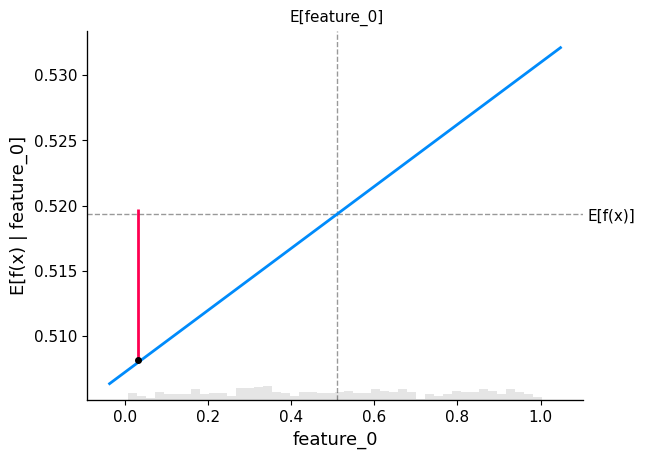

In [3]:
# compute the SHAP values for the xgboost
explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X)

# make a standard partial dependence plot
sample_ind = 20
shap.partial_dependence_plot(
    "feature_0",
    model.predict,
    X_test,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values[sample_ind : sample_ind + 1, :],
)